#### Author : SINU S MARIAM
#### Designation : Data Science Intern  
#### Organization : LetsGrowMore
#### Batch : MARCH 2023
#### Task 2 -PREDICTION USING DECISION TREE ALGORITHM (INTERMEDIATE LEVEL TASK)
#### Problem Statement:
* Create Decision Tree Classifier and Visualise it Graphically
* If we feed any data into Classifier, it should be able to predict the right class accordingly

In [1]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
#importing libraries for visualisation
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
#importing Data
data_frame = pd.read_csv('C:/Users/sinun/OneDrive/Documents/letsgrowmore/predictionusingdecisiontree/Iris.csv')

####  Performing descriptive analysis. Understand the variables and their corresponding values. 

In [3]:
# Understanding the dimensions of data
data_frame.shape

(150, 6)

In [4]:
# Understanding the Data Variables
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#Identify columns in Dataset
data_frame.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
# Finding the number of species
data_frame["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:title={'center':'Histogram of Species'}, xlabel='v1'>

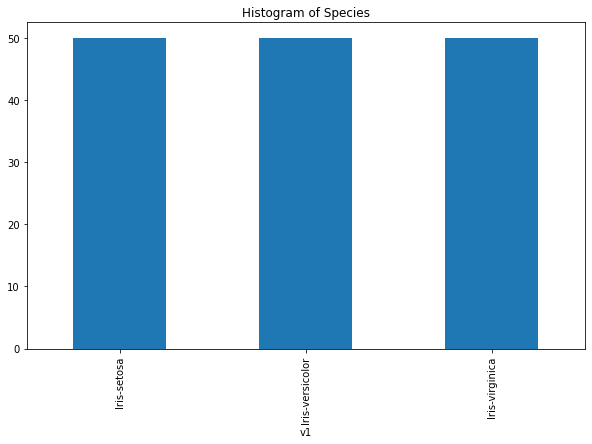

In [7]:
# Plotting Histogram of various Species of Flowers
data_frame["Species"].value_counts().plot(kind='bar',figsize=(10,6),title="Histogram of Species",xlabel="v1")

* From Histogram , it is understood that this Data set is balanced.
* Data set consists of 50 samples from each of three species of Iris Flower ie Iris setosa, Iris virginica and Iris versicolor.
* 4 features from each sample such as the length and the width of the sepals and petals are given in centimeters.

In [8]:
# Show the top 5 Rows of data
data_frame.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# Performing Descriptive Analysis
data_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [10]:
# Checking for null values
data_frame.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
# Check for Duplicated Entries
data_frame.duplicated().sum()

0

In [12]:
#Dropping unwanted Columns from data
data_frame.drop(columns=['Id'], inplace=True )

#### Outlier Analysis of Feature Variables

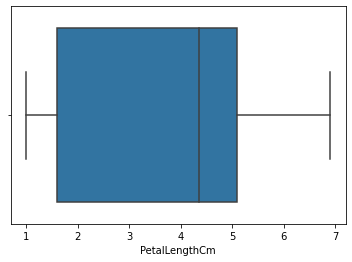

In [13]:
fig,axs=plt.subplots(1,1)
plt1=sns.boxplot(data_frame['PetalLengthCm'],ax=axs)

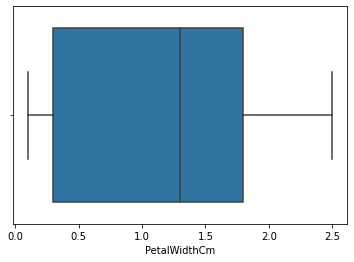

In [14]:
fig,axs=plt.subplots(1,1)
plt1=sns.boxplot(data_frame['PetalWidthCm'],ax=axs)

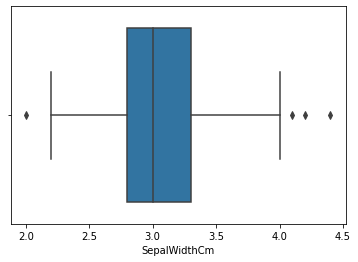

In [15]:
fig,axs=plt.subplots(1,1)
plt1=sns.boxplot(data_frame['SepalWidthCm'],ax=axs)

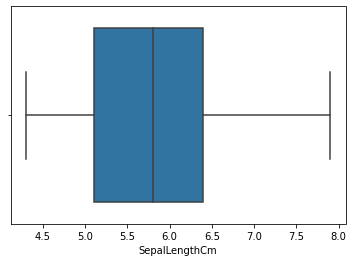

In [16]:
fig,axs=plt.subplots(1,1)
plt1=sns.boxplot(data_frame['SepalLengthCm'],ax=axs)

#### Data Visualization

#### Heat Map

In [17]:
# find correlation between variables in data set for plotting heatmap
df_corr=data_frame.corr()

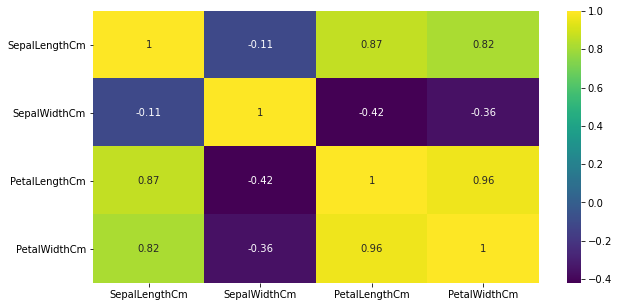

In [18]:
# Plotting Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df_corr,annot=True,cmap='viridis')
plt.show()

* Variables PetalWidth, PetalLenghth and SepalLenghth have high correlation values among themselves.
* SepalWidth has lowest correlation with other variables.

#### Distribution of Feature variables for different Species

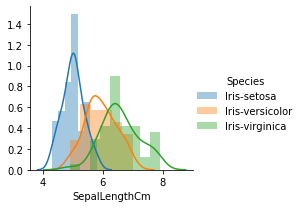

In [19]:
# Distribution of SepalLength for different Species
sns.FacetGrid(data_frame,hue="Species").map(sns.distplot,"SepalLengthCm").add_legend()

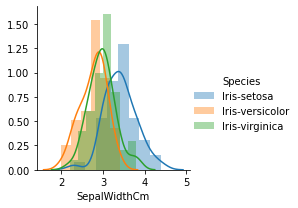

In [20]:
# Distribution of Sepalwidth for different Species
sns.FacetGrid(data_frame,hue="Species").map(sns.distplot,"SepalWidthCm").add_legend()

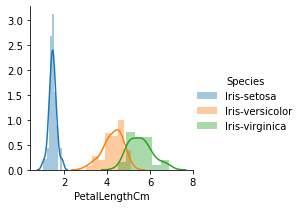

In [21]:
# Distribution of PetalLength for different Species
sns.FacetGrid(data_frame,hue="Species").map(sns.distplot,"PetalLengthCm").add_legend()

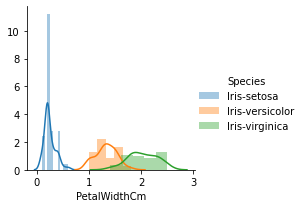

In [22]:
# Distribution of PetalWidth for different Species
sns.FacetGrid(data_frame,hue="Species").map(sns.distplot,"PetalWidthCm").add_legend()

#### LABEL ENCODING

In [23]:
# For labelling the categorical target column-'Species',Label encoding is permormed 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_frame["Species"] = le.fit_transform(data_frame['Species'])
data_frame['Species'].unique()

array([0, 1, 2])

In [24]:
data_frame.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Building the Model

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#First step in building the model is to identify the Feature(Input) variables and Target (Output) variable
features = data_frame[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
target = data_frame['Species']

In [27]:
# Splitting data for training the model and testing the model
# train size taken as 0.8
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = .8)
# Dimensions of Train and Test Data sets
print('Train set of features: ', X_train.shape)
print('Test set of features: ', X_test.shape)
print('Target for train: ', y_train.shape)
print('Target for test: ', y_test.shape)

Train set of features:  (120, 4)
Test set of features:  (30, 4)
Target for train:  (120,)
Target for test:  (30,)


### Learn the model on train data

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
# Decision tree algorithm can solve regression and classification problems.
# DT belongs to family of Supervised Machine Learning Models
my_model = DecisionTreeClassifier(max_depth = 5, random_state = 0)

In [30]:
# Fitting the model in train data set ie the Decision Tree Model should learn from the  Train Data
my_model_fit=my_model.fit(X_train, y_train)

#### Prediction

In [31]:
# Predicting the Species from Feature Test values
y_pred = my_model.predict(X_test)
y_pred

array([1, 1, 0, 2, 2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 1, 2, 0, 1, 0, 1, 0, 2,
       2, 1, 2, 2, 1, 2, 0, 0])

In [32]:
# Comparing Actual Values and Predicted values
Data_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
Data_compare

,Actual,Predicted
71,1,1
89,1,1
32,0,0
114,2,2
140,2,2
46,0,0
2,0,0
8,0,0
36,0,0
76,1,1


#### Test the model

In [33]:
# Cofusion Matrix Compares the actual target values with those predicted Values
from sklearn.metrics import confusion_matrix ,classification_report
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)

[[11  0  0]
 [ 0  7  0]
 [ 0  2 10]]


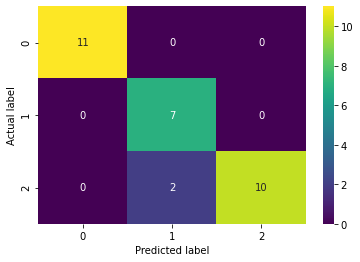

In [34]:
# Plotting Confusion Matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='viridis')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [35]:
# Printing Classification Report
cLass_repo=classification_report(y_test,y_pred)
print(cLass_repo)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.78      1.00      0.88         7
           2       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



#### VISUALIZATION OF DECISION TREE CLASSIFIER GRAPHICALY

* Decision tree is flowchart-like tree structure with each node denotes a test on a feature. 

* Decision tree formed by splitting the source set into subsets based on a feature value test and process is repeated on each derived subset until splitting no longer adds value to predictions. 

* Gini Index score  evaluates how accurate a split is among the classified groups. 

[Text(0.5357142857142857, 0.9166666666666666, 'PetalWidthCm <= 0.75\ngini = 0.666\nsamples = 120\nvalue = [39, 43, 38]\nclass = Iris-versicolor'),
 Text(0.4642857142857143, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Iris-setosa'),
 Text(0.6071428571428571, 0.75, 'PetalWidthCm <= 1.75\ngini = 0.498\nsamples = 81\nvalue = [0, 43, 38]\nclass = Iris-versicolor'),
 Text(0.35714285714285715, 0.5833333333333334, 'PetalLengthCm <= 5.05\ngini = 0.124\nsamples = 45\nvalue = [0, 42, 3]\nclass = Iris-versicolor'),
 Text(0.21428571428571427, 0.4166666666666667, 'SepalLengthCm <= 4.95\ngini = 0.046\nsamples = 42\nvalue = [0, 41, 1]\nclass = Iris-versicolor'),
 Text(0.14285714285714285, 0.25, 'PetalWidthCm <= 1.35\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = Iris-versicolor'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(0.21428571428571427, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue =

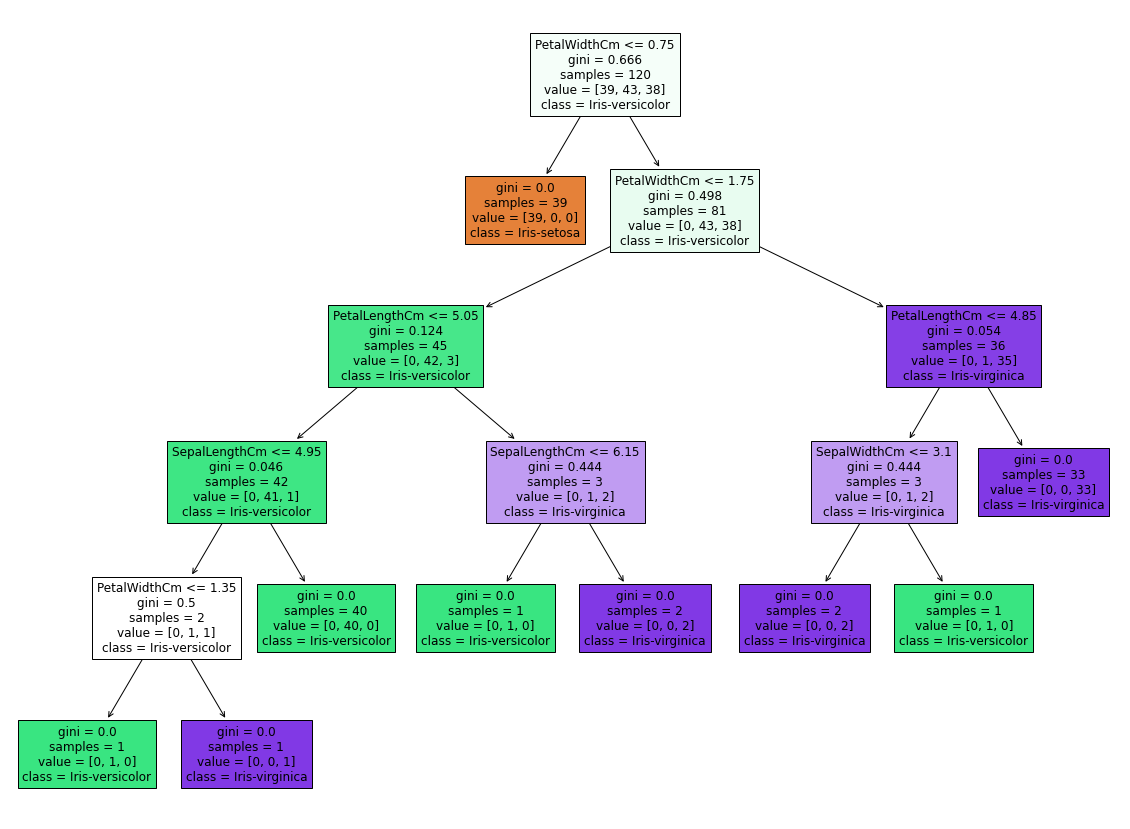

In [36]:
from sklearn import tree
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
targets=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plt.figure(figsize=(20,15))
tree.plot_tree(my_model_fit,feature_names=features,class_names=targets,filled=True,impurity=True)